In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [2]:
#Loading Data

house = pd.read_csv('data.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
#Columns info

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [4]:
#Basic Statistical 

house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
# Creating features and target
X = house.iloc[:,2:14]
y = house.iloc[:,1].values

In [6]:
#Splitting dataset as test and train to build a model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38)

### LINEAR REGRESSION

In [7]:
#Normalizing features 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
y_scaled = y_train
X_tested = sc.transform(X_test)
y_tested = y_test

In [8]:
#Building a baseline model - Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled,y_scaled)
y_pred = lr.predict(X_tested)

In [9]:
r2_score(y_tested,y_pred)

0.5473440758579227

### SUPPORT VECTOR MACHINE (SVM)

In [10]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_scaled = sc1.fit_transform(X_train)
y_scaled = y_train
X_tested = sc1.transform(X_test)
y_tested = y_test

In [11]:
#I tried kernels and choosed best was 'linear'

from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear')
svr_reg.fit(X_scaled,y_scaled)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = svr_reg.predict(X_tested)

In [13]:
r2_score(y_tested,y_pred)

-0.013970282219468277

In [14]:
svr_reg1 = SVR(kernel = 'rbf')
svr_reg1.fit(X_scaled,y_scaled)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = svr_reg1.predict(X_tested)

In [16]:
r2_score(y_tested,y_pred)

-0.03384313076670131

In [17]:
#Let`s try unscaled data on SVM with linear and rbf kernels.

svr_reg2 = SVR(kernel='rbf',gamma='auto')
svr_reg2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = svr_reg2.predict(X_test)

In [19]:
r2_score(y_test,y_pred)

-0.03435899685202237

In [20]:
svr_reg3 = SVR(kernel='linear')
svr_reg3.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = svr_reg3.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.47312367822320434

### RANDOM FOREST

In [23]:
#Question: What is the optimum estimator and how do we decide n estimator?

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,random_state=38)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=38, verbose=0,
                      warm_start=False)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.4559014952594673

In [26]:
# Let`s change n_estimators as 500
rf1 = RandomForestRegressor(n_estimators=500,random_state=38)
rf1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=38, verbose=0,
                      warm_start=False)

In [27]:
y_pred = rf1.predict(X_test)

In [28]:
r2_score(y_test,y_pred)

0.4665887869826857

### GRADIENT BOOSTING

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=38)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

In [30]:
r2_score(y_test,y_pred)

0.5019632251969264

In [31]:
#Let`s change default n-estimator as 500 
gbr1 = GradientBoostingRegressor(n_estimators=500,random_state=38)
gbr1.fit(X_train,y_train)
y_pred = gbr1.predict(X_test)

In [32]:
r2_score(y_test,y_pred)

0.3333980023288585

### UNIVARIATE SELECTION

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [34]:
model.feature_importances_

array([0.03421333, 0.08164022, 0.25061447, 0.09248207, 0.0296628 ,
       0.01333475, 0.03190069, 0.0510895 , 0.16417404, 0.04413165,
       0.18532957, 0.02142691])

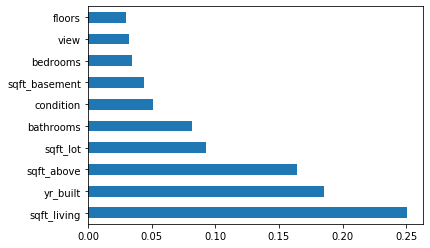

In [35]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### CORRELATION MATRIX WITH HEATMAP

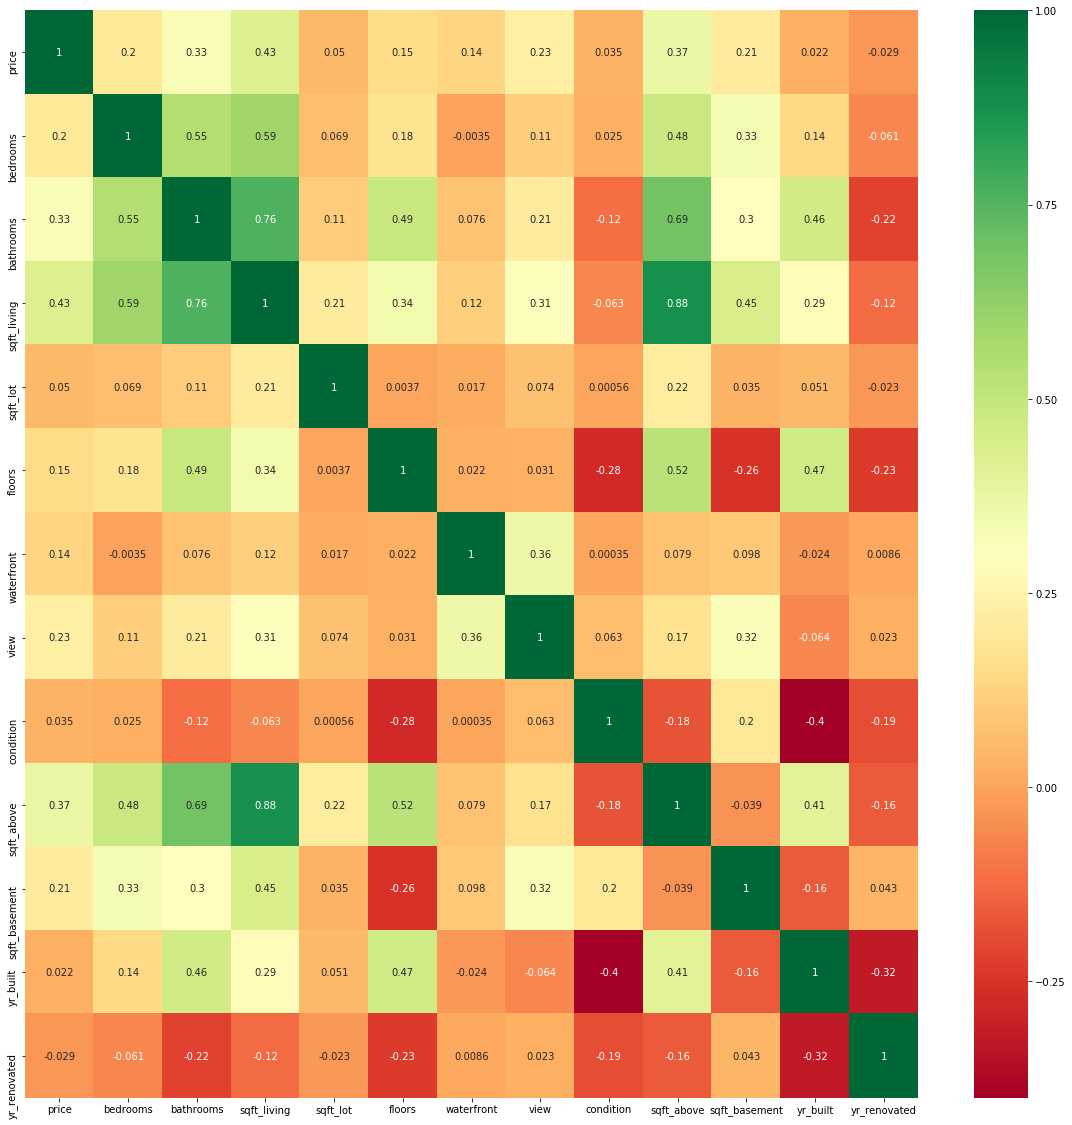

In [36]:
#what are the columns most affect price?
corrmat = house.corr()
top_cor_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(house[top_cor_features].corr(),annot=True,cmap='RdYlGn')

### PREPROCESSING POLYNOMIAL FEATURES

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_features = PolynomialFeatures(interaction_only=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
r2_score(y_test,y_test_predict)

0.5835449417335691

In [40]:
sc2 = StandardScaler()
X_poly_scaled = sc2.fit_transform(X_train_poly)
y_scaled = y_train
X_poly_tested = sc2.transform(X_test_poly)
y_tested = y_test

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_scaled,y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_poly_pred = lin_reg.predict(X_poly_tested)
r2_score(y_tested,y_poly_pred)

0.5921726562728207

### GRADIENT BOOSTING

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr2 = GradientBoostingRegressor(random_state=38)
gbr2.fit(X_train_poly,y_train)
y_pred_gr = gbr2.predict(X_test_poly)

In [44]:
r2_score(y_test,y_pred_gr)

0.5172768678473885

### LASSO REGRESSION

In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1,normalize=True,random_state=38,max_iter=1000000)

In [47]:
lasso.fit(X_poly_scaled,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000000,
      normalize=True, positive=False, precompute=False, random_state=38,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
y_lasso_pred = lasso.predict(X_poly_tested)
r2_score(y_test,y_lasso_pred)

0.5877100415288182

### RIDGE REGRESSION

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=3.7,random_state=38)
ridge.fit(X_poly_scaled,y_train)

Ridge(alpha=3.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=38, solver='auto', tol=0.001)

In [45]:
y_ridge_pred = ridge.predict(X_poly_tested)
r2_score(y_test,y_ridge_pred)

0.599859165492652

### ELASTIC NET REGRESSION

In [46]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(l1_ratio=0.1,random_state=38)
elastic.fit(X_poly_scaled,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=38, selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
y_elastic_pred = elastic.predict(X_poly_tested)
r2_score(y_test,y_elastic_pred)

0.5535719541638073

### MODEL TUNNING

In [55]:
#Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = {'alpha': alpha}

# Instantiate a lasso regression classifier
ridge = Ridge()

# Instantiate the GridSearchCV object
gs = GridSearchCV(ridge,param_grid,cv=5)

# Fit it to the data
gs.fit(X_poly_scaled,y_train)

# Print the tuned parameters and score
print('Tuned Ridge Regression Parameters: {}'.format(gs.best_params_))
print("Best score is {}".format(gs.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 0.5}
Best score is 0.30775999665547654
